# Occultation geometry

/var/folders/wn/j_ytm31108z7jt5f1x0d7j1c0000gq/T/ipykernel_66379/3943658396.py:14: UserWarning: cmr10 font should ideally be used with mathtext, set axes.formatter.use_mathtext to True
  fig, axes = plt.subplots(1, 2, figsize=(8, 3.5))


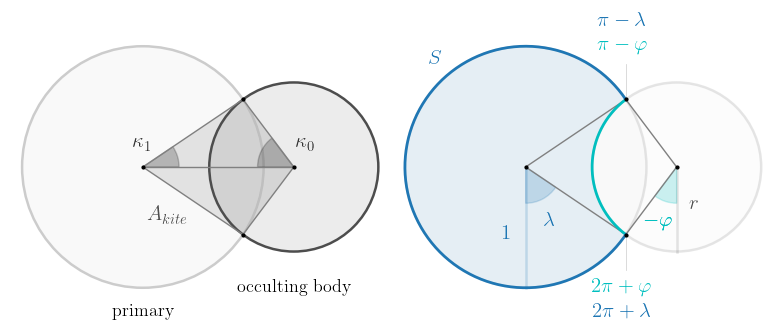

In [30]:
import numpy as np
import matplotlib.pyplot as plt

import matplotlib

font = {"family": "serif", "size": 12, "serif": "cmr10"}

matplotlib.rc("font", **font)
matplotlib.rc("text", usetex=True)

# Set up
r = 0.7
b = 1.25
fig, axes = plt.subplots(1, 2, figsize=(8, 3.5))
fig.subplots_adjust(left=0, right=1)
for ax in axes:
    ax.set_aspect(1)
    ax.axis("off")
    ax.set_ylim(-1.3, 1.3)

axes[0].set_xlim(-1.1, b + r * 1.1 + 0.0)
axes[1].set_xlim(-1.1 - 0.0, b + r * 1.1)
primary_color = "0.8"
occultor_color = "0.3"
fontsize = 15
base_lw = 1.8

## PLOT 1
# -------
ax = axes[0]
# Occulted body
circle = plt.Circle(
    (0, 0),
    1,
    edgecolor=primary_color,
    zorder=1,
    facecolor=(primary_color, 0.1),
    lw=base_lw,
)
ax.add_artist(circle)

# Occultor
circle = plt.Circle(
    (b, 0),
    r,
    edgecolor=occultor_color,
    zorder=1,
    facecolor=(occultor_color, 0.1),
    lw=base_lw,
)
ax.add_artist(circle)

# LINES and POINTS
point_style = dict(color="k", marker=".", ms=4, zorder=20)
kite_lines_style = dict(color="0.5", lw=1.0)
sinphi = (1 - r**2 - b**2) / (2 * b * r)
cosphi = np.cos(np.arcsin(sinphi))
d = b + r * sinphi
ax.plot([0, d], [0, r * cosphi], **kite_lines_style)
ax.plot([0, d], [0, -r * cosphi], **kite_lines_style)
ax.plot([d, b], [-r * cosphi, 0], **kite_lines_style)
ax.plot([d, b], [r * cosphi, 0], **kite_lines_style)
ax.plot([0, b], [0, 0], **kite_lines_style)
ax.plot(d, r * cosphi, **point_style)
ax.plot(d, -r * cosphi, **point_style)
ax.plot(0, 0, **point_style)
ax.plot(b, 0, **point_style)

# ANGLES
from jaxoplanet.core.limb_dark import kappas
from matplotlib.patches import Wedge, Polygon

_, k0, k1 = kappas(b, r)

wedge_style = dict(color="k", alpha=0.2)
wedge_r = 0.3
phi_wedge = Wedge(0, wedge_r, 0, np.rad2deg(k1), **wedge_style)
ax.add_artist(phi_wedge)
ax.text(0, 0.2, r"$\kappa_1$", ha="center", va="center", fontsize=fontsize, color="0.2")

phi_wedge = Wedge((b, 0), -wedge_r, -np.rad2deg(k0), 0, **wedge_style)
ax.add_artist(phi_wedge)
ax.text(
    b + 0.1,
    0.2,
    r"$\kappa_0$",
    ha="center",
    va="center",
    fontsize=fontsize,
    color="0.2",
)

# POLYGON
poly = Polygon(
    [[0, 0], [d, r * cosphi], [b, 0], [d, -r * cosphi]],
    closed=True,
    facecolor="k",
    zorder=-10,
    alpha=0.1,
    lw=base_lw + 0.5,
)
ax.add_artist(poly)
ax.text(
    0.2, -0.4, "$A_{kite}$", ha="center", va="center", fontsize=fontsize, color="0.3"
)

plt.tight_layout()


##  PLOT 2
# --------
ax = axes[1]
# Occulted body
circle = plt.Circle(
    (0, 0),
    1,
    edgecolor=(primary_color, 0.5),
    zorder=1,
    facecolor=(primary_color, 0.05),
    lw=base_lw,
)
ax.add_artist(circle)

# Occultor
circle = plt.Circle(
    (b, 0),
    r,
    edgecolor=(primary_color, 0.5),
    zorder=1,
    facecolor=(primary_color, 0.05),
    lw=base_lw,
)
ax.add_artist(circle)

# LINES and POINTS
ax.plot([0, d], [0, r * cosphi], **kite_lines_style)
ax.plot([0, d], [0, -r * cosphi], **kite_lines_style)
ax.plot([d, b], [-r * cosphi, 0], **kite_lines_style)
ax.plot([d, b], [r * cosphi, 0], **kite_lines_style)
ax.plot(d, r * cosphi, **point_style)
ax.plot(d, -r * cosphi, **point_style)
ax.plot(0, 0, **point_style)
ax.plot(b, 0, **point_style)


# CONTOURS AND AREA
phi = np.linspace(-k0, k0, 200)
x0 = r * np.cos(phi)
y0 = r * np.sin(phi)
ax.plot(b - x0, y0, "c", lw=base_lw * 1.1)

phi = np.linspace(k1, 2 * np.pi - k1, 200)
x1 = np.cos(phi)
y1 = np.sin(phi)
ax.plot(x1, y1, "C0", lw=base_lw * 1.1)

fill_style = dict(facecolor="C0", alpha=0.1)
x = np.linspace(b - r, d, 100)
y0 = r * np.sqrt(1 - (x - b) ** 2 / r**2)
y1 = np.sqrt(1 - x**2)
plt.fill_between(x, y0, y1, **fill_style)
plt.fill_between(x, -y1, -y0, **fill_style)
x = np.linspace(-1, b - r, 100)
plt.fill_between(x, 0, np.sqrt(1 - x**2), **fill_style)
plt.fill_between(x, 0, -np.sqrt(1 - x**2), **fill_style)

# ANGLES
plt.plot([0, 0], [0, -1], color="C0", lw=base_lw, alpha=0.2)
plt.plot([b, b], [0, -r], color="k", lw=base_lw, alpha=0.1)
phi_wedge = Wedge(
    0,
    wedge_r,
    np.rad2deg(3 * np.pi / 2),
    np.rad2deg(3 * np.pi / 2 + (np.pi / 2 - k1)),
    color="C0",
    alpha=0.2,
)
ax.add_artist(phi_wedge)
ax.text(
    0.2, -0.45, r"$\lambda$", ha="center", va="center", fontsize=fontsize, color="C0"
)

phi_wedge = Wedge(
    (b, 0),
    wedge_r,
    np.rad2deg(3 * np.pi / 2 - (np.pi / 2 - k0)),
    np.rad2deg(3 * np.pi / 2),
    color="c",
    alpha=0.2,
)
ax.add_artist(phi_wedge)
ax.text(
    b - 0.15,
    -0.45,
    r"$-\varphi$",
    ha="center",
    va="center",
    fontsize=fontsize,
    color="c",
)
ax.text(
    cosphi,
    1.0,
    r"$\pi-\varphi$",
    ha="center",
    va="center",
    fontsize=fontsize,
    color="c",
)
ax.text(
    cosphi,
    1.2,
    r"$\pi-\lambda$",
    ha="center",
    va="center",
    fontsize=fontsize,
    color="C0",
)

ax.text(
    b - 0.15,
    -0.45,
    r"$-\varphi$",
    ha="center",
    va="center",
    fontsize=fontsize,
    color="c",
)
ax.text(
    cosphi,
    -1.0,
    r"$2\pi+\varphi$",
    ha="center",
    va="center",
    fontsize=fontsize,
    color="c",
)
ax.text(
    cosphi,
    -1.2,
    r"$2\pi+\lambda$",
    ha="center",
    va="center",
    fontsize=fontsize,
    color="C0",
)

plt.plot([b + r * sinphi] * 2, [r * cosphi, 0.85], lw=0.5, c="0.8", zorder=-100)
plt.plot([b + r * sinphi] * 2, [-r * cosphi, -0.85], lw=0.5, c="0.8", zorder=-100)

axes[0].text(0, -1.2, "primary", fontsize=13, color="k", va="center", ha="center")
axes[0].text(
    b, -1.0, "occulting body", fontsize=13, color="k", va="center", ha="center"
)
ax.text(-0.2, -0.6, r"$1$", fontsize=fontsize, color="C0")
ax.text(b + 0.1, -r / 2, r"$r$", fontsize=fontsize, color="0.3")
axes[1].text(-0.8, 0.85, r"$S$", fontsize=fontsize, color="C0")
plt.tight_layout()
plt.savefig("figures/occultation_geometry.pdf")